<h1 align="center">Volume 3: Data Augmentation.</h1>

    NAME Caelan Osman
    Section Sec. 1
    DATE October 19, 2021

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
from imageio import imread
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree
from sklearn import datasets
import numpy as np
import librosa
import librosa.display
from sklearn.metrics import confusion_matrix

<h2 align="center">Image Augmentation</h2>

<h3 align="center">Problem 1</h3>

In [2]:
def translate(images, A, B): 
    """Returns each image translated by a random amount (a,b), where
    a~Uniform(-A,A) and b~Uniform(-B,B). The resulting image should be cropped
    to be of size (d1,d2). Note that this translation will leave a border on
    two sides of the image. Fill the empty border with the parts that were cropped
    off the opposite sides.
        Parameters:
            images (d1,d2): d1 x d2 array 
            A (float): horizontal translation parameter
            B (float): vertical translation parameter
        Returns:
            translated_image (d1,d2): array of translated images
    """
    #get shape of image
    d1, d2 = images.shape
    #get coordinate array
    coords = np.mgrid[0:d1, 0:d2].reshape((2,d1*d2))
    #get our random values
    a, b = np.random.uniform(-A, A), np.random.uniform(-B, B)
    #make length 2 column array
    translation_array = np.array([a, b]).reshape(-1, 1)
    #translate
    new_coords = coords + translation_array
    #make sure they are ints
    new_coords = new_coords.astype(int)

    #get and return translated image
    x, y = new_coords.reshape((2, d1, d2), order='F')
    translated_image = np.take(images, x + d1*y, mode='wrap').reshape((d1, d2))

    return translated_image

def rotate(images, theta): 
    """ Returns an image rotated by a random amount t~Uniform(-theta,theta).
    The resulting image should be cropped to be the same size as the original,
    and any blank parts should be filled with one of the parts cropped off the
    other side.
        Parameters:
            images (d1,d2): d1 x d2 array
            theta (float): largest acceptable rotation angle
        Returns:
            rotated_image (d1,d2): array of rotated image
    """
    #get shape of image
    d1, d2 = images.shape
    #get coordinate array
    coords = np.mgrid[0:d1, 0:d2].reshape((2,d1*d2))
    #get our random values
    theta = np.random.uniform(-theta, theta)
    #create the rotation matrix
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])
    #get new coordinates as int
    new_coords = rotation_matrix@coords
    new_coords = new_coords.astype(int)
    #return the rotated image
    x, y = new_coords.reshape((2, d1, d2), order='F')
    rotated_image = np.take(images, x + d1*y, mode='wrap').reshape((d1, d2))

    return rotated_image

    
def skew(images, A): 
    """ Returns an image with the linear transformation [[1,a],[0,1]] applied,
    where a~Uniform(-A,A). Crop the parts that go outside the image boundaries
    and fill missing areas with the appropriate cropped piece.
        Parameters:
            images (d1,d2): d1 x d2 array
            A (float): skew parameter
        Returns:
            skewed_image (d1,d2): array of skewed image
    """

    #get shape of image
    d1, d2 = images.shape
    #get coordinate array
    coords = np.mgrid[0:d1, 0:d2].reshape((2,d1*d2))
    #get our random values
    a = np.random.uniform(0, A)
    #create the skew matrix
    skew_matrix = np.array([[1, a],
                            [0, 1]])
    #get new coordinates as int
    new_coords = skew_matrix@coords
    new_coords = new_coords.astype(int)
    #return the rotated image
    x, y = new_coords.reshape((2, d1, d2), order='F')
    skewed_image = np.take(images, x + d1*y, mode='wrap').reshape((d1, d2))

    return skewed_image

    
def flip_horizontal(images):
    """Flip horizontal. Returns a horizontally flipped version of each image.
        Parameters:
            images (d1,d2): d1 x d2 image array 
        Returns:
            flipped_image (d1,d2): array of flipped image
    """

    #get shape of image
    d1, d2 = images.shape
    #get coordinate array
    coords = np.mgrid[0:d1, 0:d2].reshape((2,d1*d2))

    #horizontally flip the image
    coords[0] -= 1
    coords[1] +=1
    horizontal_flip = np.eye(2)
    horizontal_flip[0, 0] = -1
    new_coords = horizontal_flip @ coords
    new_coords = new_coords.astype(int)
 

    #return the rotated image
    x, y = new_coords.reshape((2, d1, d2), order='F')
    flipped_image = np.take(images, x + d1*y, mode='wrap').reshape((d1, d2))

    return flipped_image

    
def gauss_noise(images, sigma2): 
    """Adds Gaussian noise with parameter sigma2. For each image draw d1xd2 random
    noise values from N(0,sigma2) and add those to the original image.
        Parameters:
            images (d1,d2): d1 x d2 array 
        Returns:
            noisy_image: array of noisy image
    """
    #get shape of image
    d1, d2 = images.shape
    #get draw
    draw = np.random.normal(loc=0, scale=np.sqrt(sigma2), size=(d1,d2))
    #get new coordinates
    return images + draw
    

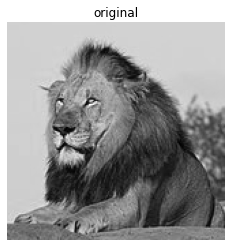

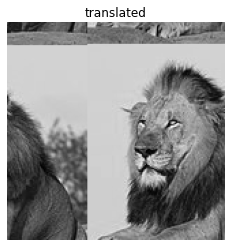

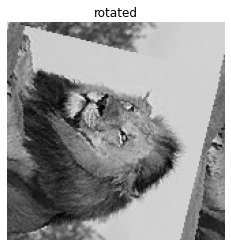

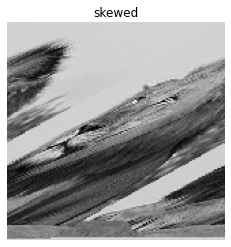

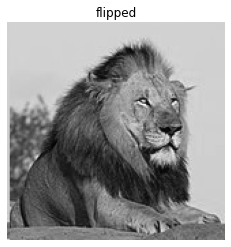

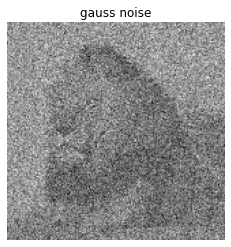

In [3]:
lion = imread('lion.png')
imshow(lion, cmap='gray')
plt.title('original')
plt.axis('off')
plt.show()

translate_lion = translate(lion, 200, 200)
imshow(translate_lion, cmap='gray')
plt.title('translated')
plt.axis('off')
plt.show()

rotate_lion = rotate(lion, 20)
imshow(rotate_lion, cmap='gray')
plt.title('rotated')
plt.axis('off')
plt.show()

skew_lion = skew(lion, 2)
imshow(skew_lion, cmap='gray')
plt.title('skewed')
plt.axis('off')
plt.show()

flip = flip_horizontal(lion)
imshow(flip, cmap='gray')
plt.title('flipped')
plt.axis('off')
plt.show()

noise = gauss_noise(lion, 10000)
imshow(noise, cmap='gray')
plt.title('gauss noise')
plt.axis('off')
plt.show()


<h3 align="center"> Problem 2 </h3>
Take the sklearn digits dataset, make an 80-20 train-test split, then apply 
each of your transformations to the entire training set. You must decide good 
values of each of the parameters to use---justify each choice.
This should give you a larger (augmented) training set with roughly 8,600 
training points. Fit a random forest to the augmented training set and to the 
original training set and return the results of each on the test set. 

In [4]:
def image_augment(X,Y,parameters):
    """ transform the images using the functions above. 
    Parameters:
        X (N,d1,d2): array containing N images of dimension d1 x d2
        Y (N,): Labels/values for each image
        parameters: List of parameter values [A,B,theta,A,sigma2]
    Returns:
        augmented_X (6N,d1,d2): original and transformed data in one array 
        augmented_Y (6N): corresponding labels/values
    """

    augmented_images = []
    augmented_labels = []

    for i, image in enumerate(X):
        #get the new images starting with the original
        #and going through each 5 functions above.
        augmented_images.append(image)
        augmented_images.append(translate(image, parameters[0], parameters[1]))
        augmented_images.append(rotate(image, parameters[2]))
        augmented_images.append(skew(image, parameters[3]))
        augmented_images.append(flip_horizontal(image))
        augmented_images.append(gauss_noise(image, parameters[-1]))
        #now add the corresponding labels
        for _ in range(6):
            augmented_labels.append(Y[i])


    return augmented_images, augmented_labels

#now we train our RF
digits = datasets.load_digits()
images = digits.images
labels = digits.target
#define parameter values
parameters=[10, 10, np.pi, 5, 5000]

#the original training set
original_image_train, original_image_test, original_label_train, original_label_test = train_test_split(images, labels, train_size = 0.8)

#get augmented images and labels for training
augmented_image_train, augmented_label_train = image_augment(original_image_train, original_label_train, parameters)

#create and train our two random forests remember to flatten the array
original_rf = RandomForestClassifier()
original_rf.fit([image.ravel() for image in original_image_train], original_label_train)

augmented_rf = RandomForestClassifier()
augmented_rf.fit([image.ravel() for image in augmented_image_train], augmented_label_train )

original_accuracy = original_rf.score([image.ravel() for image in original_image_test], original_label_test) 
augmented_accuracy = augmented_rf.score([image.ravel() for image in original_image_test], original_label_test)

print('Accuracy without augmentation:', original_accuracy)
print('Accuracy with augmentation:', augmented_accuracy)

Accuracy without augmentation: 0.9666666666666667
Accuracy with augmentation: 0.9722222222222222


<h2 align="center">Audio Augmentation</h2>

<h3 align="center"> Problem 3 </h3>
The file music.npy contains the audio time series data from 10 second clips of 150 different songs, with style.npy describing the associated style of ballroom dance. The styles included are Chacha, Foxtrot, Jive, Samba, Rumba, and Waltz. Use train_test_split
from sklearn.model_selection with test_size=.5 to create train and test sets. Create two training sets by augmenting this original training set. Each new augmented
training set will include the original data and the augmented data. For the first, add ambient
noise from the file restaurant-ambience.wav. For the second, use time_stretch.

In [5]:
def song_augment(songs, labels, method='ambient'):
    augmented_songs = []
    augmented_labels = []

    if method == 'ambient':
        #load in the ambient sound
        ambient, _ = librosa.load('restaurant-ambience.wav')
        #iterate through each song to modify it
        for label, song in zip(labels, songs): 
            #add the original
            augmented_songs.append(song)
            #get the current length
            current_size = song.size
            #random sample from the ambient array
            sample = np.random.choice(ambient, size=current_size, replace=False)
            #append the new song
            augmented_songs.append(song + sample)
            #append the labels
            for _ in range(2):
                augmented_labels.append(label)
    elif method == 'stretch':
        #run through the labels and songs
        for label, song in zip(labels, songs): 
            #append the song
            augmented_songs.append(song)
            #get the current song size
            current_size  = song.size
            #get a stretch favtor
            stretch_factor = np.random.uniform(0.6, 1)
            #get the stretched song
            stretched_song = librosa.effects.time_stretch(song, stretch_factor)
            #make sure it's the correct size
            stretched_song = stretched_song[:current_size]
            augmented_songs.append(stretched_song)
            #append labels
            for _ in range(2):
                augmented_labels.append(label)
    else:
        raise NotImplementedError

    return np.array(augmented_songs), np.array(augmented_labels)

#load in the music
music = np.load('music.npy')
labels = np.load('styles.npy')

#get training set
original_song_train, original_song_test, original_label_train, original_label_test = train_test_split(music, labels, train_size = 0.5)

#augment on training set
ambient_song_train, ambient_label_train = song_augment(original_song_train, original_label_train, method='ambient')
#augment on training set
stretch_song_train, stretch_label_train = song_augment(original_song_train, original_label_train, method='stretch')

<h3 align="center"> Problem 4</h3>

Do the following steps 5 times:

• Use the original data set and the augmented data sets to fit three RandomForestClassifiers,
one only on the original data, one on the original data and the data with ambient noise
added, and one on the original data and the time stretched data.

• Score each classifier.

Print the mean score for each of the classifiers and print the standard deviation for the scores.


In [6]:
#make plp a feature on original
original_song_train = np.apply_along_axis(librosa.beat.plp, 1, original_song_train)
original_song_test = np.apply_along_axis(librosa.beat.plp, 1, original_song_test)

#now make plp a feature on our augmented datasets
ambient_song_train = np.apply_along_axis(librosa.beat.plp, 1, ambient_song_train)
stretch_song_train = np.apply_along_axis(librosa.beat.plp, 1, stretch_song_train)

original_score = []
ambient_score = []
stretch_score = []

#test 5 times
for _ in range(5):
    rf = RandomForestClassifier()
    rf.fit(original_song_train, original_label_train)
    original_score.append(rf.score(original_song_test, original_label_test))

    rf = RandomForestClassifier()
    rf.fit(ambient_song_train, ambient_label_train)
    ambient_score.append(rf.score(original_song_test, original_label_test))

    rf = RandomForestClassifier()
    rf.fit(stretch_song_train, stretch_label_train)
    stretch_score.append(rf.score(original_song_test, original_label_test))

#make into arrays so we can take the mean and standard deviation
original_score = np.array(original_score)
ambient_score = np.array(ambient_score)
stretch_score = np.array(stretch_score)

#print out our results.
print('\t\t Mean \t STD')
print('Original','\t',np.round(original_score.mean(), 3),'\t',np.round(original_score.std(), 3))
print('Ambient Noise','\t',np.round(ambient_score.mean(), 3),'\t',np.round(ambient_score.std(), 3))
print('Time Stretch:','\t',np.round(stretch_score.mean(), 3),'\t', np.round(stretch_score.std(), 3))

/home/caelan/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=384 is too small for input signal of length=216
  warnings.warn(


		 Mean 	 STD
Original 	 0.475 	 0.014
Ambient Noise 	 0.544 	 0.036
Time Stretch: 	 0.453 	 0.022


<h2 align="center">SMOTE</h2>

<h3 align="center"> Problem 5 </h3>

Write a function that uses the synthetic minority oversampling technique to augment an imbalanced data set.
Your function should have the following characteristics:

Accept $X$, a matrix of minority class samples
       $N$, the number of samples to generate per original point
       $k$, the number of nearest neighbors.

For each original point in the sample, pick one of the $k$ nearest neighbors at random and generate a new point that lies between the two original values. 

Return an array containing the synthetic samples.


In [7]:
def smote(X,N,k):
    """ Generate synthetic points using the SMOTE method. Hint! Use KDTree :)
    Parameters:
        X (n,m): minority class samples
        N (int): number of samples to generate from each point
        k (int): number of nearest neighbors
    Returns:
        synthetic ndarray(N*n,m): synthetic minority class samples
    """
    # the number of columns in the number features and
    # the number of rows is the number of observations (points) 
    n, m = X.shape
    synthetic_samples = np.zeros((N*n, m))
    #create tree
    tree = KDTree(X)
    for i in range(m):
        #get k nearest neighbors for the current row
        dist, indices = tree.query(X[i:i+1], k=k)
        #now we have to create our new samples
        for j in range(N):
            #random choice of the nearest neighbors
            neighbor = X[indices[0][np.random.randint(len(indices[0]))]]
            #now generate a random point that lies between the two original values
            random_point = np.random.uniform(0, 1, m)
            #set the row of the new array
            synthetic_samples[i*N+j] = X[i] + (neighbor - X[i])*random_point

    return synthetic_samples

<h3 align="center"> Problem 6 </h3>

The dataset found in creditcard.npy contains information about credit card purchases made over a two day period. 
Of the approximately 285,000 observations, 492 are fraudulent purchases. 
The last column indicates if the purchase was valid (0) or fraudulent (1). 

Do the following steps 10 times:

• Create a training and test set from the data using train_test_split from sklearn.
model_selection with test_size=.7.

• Use smote with N = 500 and k = 2 to augment the training set.

• Create two Gaussian Naïve Bayes classifiers (from sklearn.naive_bayes.GaussianNB),
one which wil be trained on only the original data and the other on the SMOTE augmented
data and the original data.

• Fit each classifier and find the recall and accuracy of each model.

Print the mean recall and mean accuracy of each model and and describe the findings.

In [10]:
credit_card_data = np.load('creditcard.npy')
purchases = credit_card_data[:, :-1]
fraud = credit_card_data[:, -1]

#split up the data set
purchases_train, purchases_test, fraud_train, fraud_test = train_test_split(purchases, fraud, test_size = 0.7)
# we need to find the minority data set
#get the training set with label 1
mask = fraud_train == 1
smote_train = purchases_train[mask]
#use function from problem 5
additional_smote = smote(smote_train, 500, 2)
m, _ = additional_smote.shape
smote_fraud = np.ones(m)
#create our augmented array
smote_train = np.vstack((purchases_train, additional_smote))
smote_fraud = np.hstack((fraud_train, smote_fraud))

#initialize all of our lists
orig_score = []
orig_recall = []
smote_score = []
smote_recall = []

for _ in range(10):

    #train and score with original data set
    clf = GaussianNB()
    #fit the classifier
    clf.fit(purchases_train, fraud_train)
    #get the score and append it
    accuracy = clf.score(purchases_test, fraud_test)
    orig_score.append(accuracy)
    #now we get the confusion matrix
    clf_predicted = clf.predict(purchases_test)
    CM = confusion_matrix(fraud_test, clf_predicted)
    #now we can append the recall to the array
    orig_recall.append(CM[1, 1]/(CM[1, 1]+CM[1, 0]))

    #now we do the same for the smote training set
    clf = GaussianNB()
    #fit the classifier
    clf.fit(smote_train, smote_fraud)
    #get the score and append it
    accuracy = clf.score(purchases_test, fraud_test)
    smote_score.append(accuracy)
    #now we get the confusion matrix
    clf_predicted = clf.predict(purchases_test)
    CM = confusion_matrix(fraud_test, clf_predicted)
    #now we can append the recall to the array
    smote_recall.append(CM[1, 1]/(CM[1, 1]+CM[1, 0]))
    
#change lists into arrays
orig_score = np.array(orig_score)
orig_recall = np.array(orig_recall)
smote_score = np.array(smote_score)
smote_recall = np.array(smote_recall)

#get the mean of all the arrays
mean_orig_score = orig_score.mean()
mean_orig_recall = orig_recall.mean()
mean_smote_score = smote_score.mean()
mean_smote_recall = smote_recall.mean()

print('\t\t Recall \t Accuracy')
print('Original', '\t', np.round(mean_orig_recall, 5), '\t', np.round(mean_orig_score, 5))
print('SMOTE', '\t\t', np.round(mean_smote_recall, 5), '\t', np.round(mean_smote_score, 5))

[[ 6.0353000e+04 -3.9752164e+00  5.8157325e-01 ...  9.6201479e-01
  -6.7355740e-01  4.5482001e+02]
 [ 7.6826000e+04 -6.6162930e+00  3.5634279e+00 ... -5.1463693e-01
   3.8859028e-01  2.5475999e+02]
 [ 9.3879000e+04 -1.3086519e+01  7.3521485e+00 ... -2.4983003e+00
  -7.1106613e-01  3.0309999e+01]
 ...
 [ 9.5559000e+04 -1.6308651e+01  1.1614800e+01 ... -2.9427750e+00
  -4.6267962e-01  1.6300000e+00]
 [ 9.3853000e+04 -6.1858573e+00  7.1029849e+00 ... -2.0391732e-01
   3.9892718e-01  4.4900002e+01]
 [ 5.3076000e+04  1.2962308e+00  4.1744730e-01 ...  3.2838039e-02
   2.0600198e-02  1.1799999e+00]]
		 Recall 	 Accuracy
Original 	 0.6369 	 0.99403
SMOTE 		 0.75595 	 0.98708
